## IMPORTING BASIC LIBRARIES & DATA

In [28]:
# importing basic libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# importing data
data = pd.read_csv('hotel_cancel.csv')

## ------ POINT ESTIMATOR & CONFIDENCE INTERVAL  ------

- Sample Mean/Proportion: Point Estimator of the population parameter (single point estimation)
        - efficient, consistent & unbiased
- Confidence Interval (CI): Interval Estimator of the population parameter (range of values estimation)
        - CI = 1 - alpha
        - alpha = probability of error, level of significance 
        - larger n_samples, smaller margin of error
        - Width of CI = margin of error x 2
        - CI has to be narrow enough to be precise & wide enough to be accurate
        - 95% CI means that from all possible samples, we will be right 95% of the time

## ------ CONFIDENCE INTERVAL WITH SAMPLE MEAN (UNKNOWN POP-STDEV)  ------

- used when population standard deviation is unknown, which is generally the case
- it assumes normal or approximately normal distributions (n >= 30)
- uses t-distributions, it works well with both small & large samples
- CI = sample_mean +- [t_score * sample_stdev/np.sqrt(n)]

### Example 1

In [18]:
# sample data of car mpg
c = [97, 117, 93, 79, 97,
    87, 78, 83, 94, 96,
    102, 98, 82, 96, 113,
    113, 111, 90, 101, 99,
    112, 89, 92, 96, 98]

In [23]:
# number of samples
len(c)

25

In [48]:
# degrees of freedom
len(c)-1

24

In [19]:
# sample mean
np.mean(c)

96.52

In [20]:
# standard error (sample stdev divided by np.sqrt(number of samples))
st.sem(c)

2.1394080178092882

In [50]:
# confidence interval of 90%
st.t.interval(0.90, len(c)-1, loc=np.mean(c), scale=st.sem(c))

(92.85972516071553, 100.18027483928445)

- with 90% confidence, the average mpg of all cars is between 92.86 mpg & 100.18 mpg

In [51]:
# confidence interval of 95%
st.t.interval(0.95, len(c)-1, loc=np.mean(c), scale=st.sem(c))

(92.10447886930795, 100.93552113069204)

- with 95% confidence, the average mpg of all cars is between 92.10 mpg & 100.94 mpg

In [52]:
# confidence interval of 99%
st.t.interval(0.99, len(c)-1, loc=np.mean(c), scale=st.sem(c))

(90.53620519816153, 102.50379480183847)

- with 99% confidence, the average mpg of all cars is between 90.54 mpg & 102.50 mpg
- Note: the higher the CI, the wider the interval (to account for accuracy)

### Example 2

In [56]:
# stratified random sampling with adr data  
a = data.groupby('hotel',group_keys=False)['adr'].apply(lambda x: x.sample(100))

# number of samples
len(a)

200

In [53]:
# degrees of freedom
len(a)-1

199

In [54]:
# sample mean
np.mean(a)

102.87469999999999

In [55]:
# standard error (sample stdev divided by np.sqrt(number of samples))
st.sem(a)

4.002162422972017

In [57]:
# confidence interval of 90%
st.t.interval(0.90, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(89.96103267789121, 100.68116732210876)

- with 90% confidence, the average adr of all hotel orders is between 89.96 & 100.68 

In [58]:
# confidence interval of 90%
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(88.92502082222624, 101.71717917777373)

- with 95% confidence, the average adr of all hotel orders is between 88.93 & 101.72

In [59]:
# confidence interval of 90%
st.t.interval(0.99, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(86.88548395529038, 103.75671604470959)

- with 99% confidence, the average adr of all hotel orders is between 86.89 & 103.76

## ------ CONFIDENCE INTERVAL WITH SAMPLE MEAN (KNOWN POP-STDEV)  ------

- used when population standard deviation is known, which is rarely the case
- it assumes normal or approximately normal distributions (n >= 30)
- uses z-distributions, it works well with large samples
    - 90% CI = 1.64
    - 95% CI = 1.96
    - 99% CI = 2.57
- CI = sample_mean +- [z_score * pop_stdev/np.sqrt(n)]

### Example 3

In [76]:
sample_mean = 261.75    # mean cholesterol of sample
population_stdev = 64.9 # standard deviation for female population
n = 97                  # total number of samples

In [77]:
# standard error for mean
se = population_stdev/np.sqrt(n)
se

6.589596611717189

In [80]:
# z-score from the z table (for 90% confidence)
z = 1.64                

# lower & upper limit of the CI
lower = sample_mean - (z* se)  
upper = sample_mean + (z* se)  
(lower, upper)

(250.94306155678382, 272.5569384432162)

- with 90% confidence, the average cholestrol level of females is between 250.94 & 272.56

In [79]:
# z-score from the z table (for 95% confidence)
z = 1.96                

# lower & upper limit of the CI
lower = sample_mean - (z* se)  
upper = sample_mean + (z* se)  
(lower, upper)

(248.8343906410343, 274.6656093589657)

- with 95% confidence, the average cholestrol level of females is between 248.83 & 274.67

In [81]:
# z-score from the z table (for 99% confidence)
z = 2.57                

# lower & upper limit of the CI
lower = sample_mean - (z* se)  
upper = sample_mean + (z* se)  
(lower, upper)

(244.81473670788682, 278.6852632921132)

- with 99% confidence, the average cholestrol level of females is between 244.81 & 278.69

## ------ CONFIDENCE INTERVAL WITH SAMPLE PROPORTION  ------

- it assumes normal or approximately normal distributions (np >= 5 & n(1-p) >= 5)
- uses z-distributions
- CI = sample_proportion +- [np.sqrt(p * (1-p)/n)]

### Example 4

In [110]:
# number of samples 
len(c)

25

In [88]:
# getting the mpg > 100
above100 = []
for i in c:
    if i > 100:
        above100.append(i)

# number of samples > 100 mpg
len(above100)

7

In [92]:
# sample proportion of above 100 mps
len(above100)/len(c)

0.28

In [107]:
# standard error for proportion
np.sqrt(p * (1-p)/n)

0.0897997772825746

In [111]:
# confidence interval 90%
sm.stats.proportion_confint(nobs=len(c), count=len(above100), alpha=0.10) 

(0.13229251063732272, 0.42770748936267733)

- with 90% confidence, the percentage of cars that has over 100 mpg is between 13.2% & 42.8%

In [112]:
# confidence interval 95%
sm.stats.proportion_confint(nobs=len(c), count=len(above100), alpha=0.05) 

(0.10399567070643564, 0.4560043292935644)

- with 95% confidence, the percentage of cars that has over 100 mpg is between 10.4% & 45.6%

In [113]:
# confidence interval 99%
sm.stats.proportion_confint(nobs=len(c), count=len(above100), alpha=0.01) 

(0.048691102223379495, 0.5113088977766206)

- with 99% confidence, the percentage of cars that has over 100 mpg is between 4.9% & 51.1%

### Example 5

In [117]:
# number of samples 
n = len(data['is_canceled'])
n

119390

In [121]:
# number of samples 
n_canceled = len(data[data['is_canceled']==1])
n_canceled

44224

In [122]:
# confidence interval 90%
sm.stats.proportion_confint(nobs=n, count=n_canceled, alpha=0.10) 

(0.3681174093503072, 0.3727151561911955)

- with 90% confidence, the percentage of canceled orders is between 36.8% & 37.3%

In [124]:
# confidence interval 95%
sm.stats.proportion_confint(nobs=n, count=n_canceled, alpha=0.05) 

(0.3676770061352748, 0.37315555940622785)

- with 95% confidence, the percentage of canceled orders is between 36.8% & 37.3%

In [125]:
# confidence interval 99%
sm.stats.proportion_confint(nobs=n, count=n_canceled, alpha=0.01) 

(0.36681626303373405, 0.3740163025077686)

- with 99% confidence, the percentage of canceled orders is between 36.7% & 37.4%
- Note: there's little difference between 90, 95 & 99% CI due to large number of samples (larger n_samples, smaller margin of error)

### Example 5

case:
- there's 1300 people living in neighbourhood A
- 100 people (sample) is tested for PCR test
- 10 people has covid

In [126]:
# confidence interval 90%
sm.stats.proportion_confint(nobs=100, count=10, alpha=0.10) 

(0.050654391191455816, 0.1493456088085442)

In [5]:
# infering the lowest proportion from 90% CI to the population
print("with 90% confidence, there's at least {} people & at most {} people who has covid in neighbourhood A".format
      (round(0.050654391191455816*1300), round(0.1493456088085442* 1300)))

with 90% confidence, there's at least 66 people & at most 194 people who has covid in neighbourhood A


In [130]:
# confidence interval 95%
sm.stats.proportion_confint(nobs=100, count=10, alpha=0.05) 

(0.04120108046379837, 0.15879891953620165)

In [6]:
# infering the lowest proportion from 95% CI to the population
print("with 95% confidence, there's at least {} people & at most {} people who has covid in neighbourhood A".format
      (round(0.04120108046379837* 1300), round(0.15879891953620165* 1300)))

with 95% confidence, there's at least 54 people & at most 206 people who has covid in neighbourhood A


In [131]:
# confidence interval 99%
sm.stats.proportion_confint(nobs=100, count=10, alpha=0.01) 

(0.02272512089353297, 0.17727487910646705)

In [7]:
# infering the lowest proportion from 99% CI to the population
print("with 99% confidence, there's at least {} people & at most {} people who has covid in neighbourhood A".format
      (round(0.02272512089353297*1300), round(0.17727487910646705*1300)))

with 99% confidence, there's at least 30 people & at most 230 people who has covid in neighbourhood A


## ------ SELECTING SAMPLE SIZE  ------

In [32]:
# creating function for CI-mean sample sizing
def n_size_mean(z, max_, min_, margin):
    q = (max_- min_)/4
    result = (z * q/margin)**2
    return print(round(result),'samples required')

### Example 6

In [31]:
# zscore: 1.64 (90% CI), max_values: 118 mpg, min_values: 76 mpg, desired margin of error: +-2 mpg
n_size_mean(1.645, 118, 76, 2) 

75 samples required


### Example 7

In [30]:
# zscore: 1.96 (95% CI), max_values & min_values: from data, desired margin of error: +-10 units
n_size_mean(1.96, np.max(data['adr']), np.min(data['adr']), 10)

70179 samples required


In [33]:
# creating function for CI-proportion sample sizing
def n_size_prop(z, proportion, margin):
    result = (z/margin)**2 * proportion * (1-proportion)
    return print(round(result),'samples required')

### Example 8

In [34]:
# zscore: 1.64 (90% CI), proportion-estimate: 50%, desired margin of error: +10 %
n_size_prop(1.645, 0.50, 0.10) 

68 samples required


## ------ STATISTICAL QUALITY CONTROL  ------

### Group Mean

Result:
Group 9 out of mean control limits!


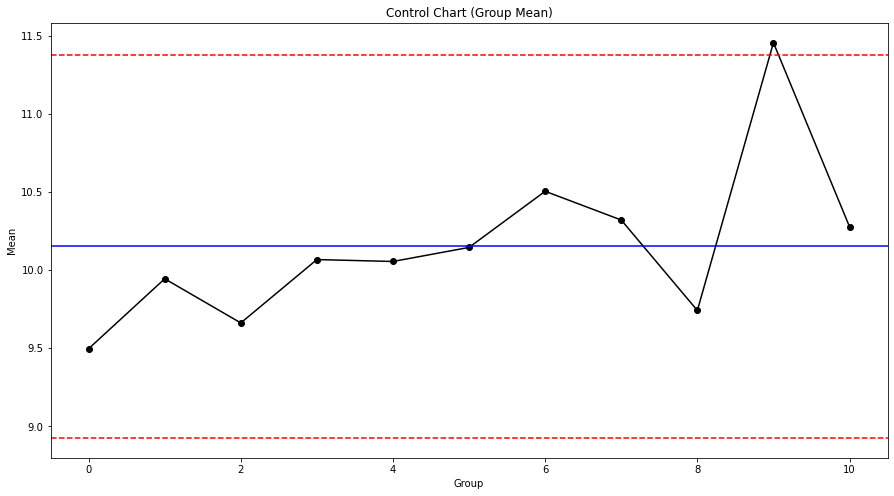

In [107]:
# creating dummy data
np.random.seed(2)
x = np.array([
        list(np.random.normal(loc=10, scale=2, size=25)),
        list(np.random.normal(loc=10, scale=2, size=25)),
        list(np.random.normal(loc=10, scale=2, size=25)),
        list(np.random.normal(loc=10, scale=2, size=25)),
        list(np.random.normal(loc=10, scale=2, size=25)),
        list(np.random.normal(loc=10, scale=2, size=25)),
        list(np.random.normal(loc=10, scale=2, size=25)),
        list(np.random.normal(loc=10, scale=2, size=25)),
        list(np.random.normal(loc=10, scale=2, size=25)),
        list(np.random.normal(loc=11.8, scale=2, size=25)),
        list(np.random.normal(loc=11, scale=2, size=25))])
        
# defining list variable for groups means & standard deviations
x_bar = []
s = [] 

# getting groups means and standard deviations
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))

# plotting control chart
fig, axs = plt.subplots(figsize=(15, 8))
axs.plot(x_bar, linestyle='-', marker='o', color='black')
axs.axhline((np.mean(x_bar)), color='blue')
axs.axhline((np.mean(x_bar) + 3*np.mean(s)/np.sqrt(len(group))), color='red', linestyle='dashed')
axs.axhline((np.mean(x_bar) - 3*np.mean(s)/np.sqrt(len(group))), color='red', linestyle='dashed')
axs.set_title('Control Chart (Group Mean)')
axs.set(xlabel='Group', ylabel='Mean')

# validating limits
i = 0
control = True
print('Result:')
for num in x_bar:
    if num > np.mean(x_bar) + 3*np.mean(s)/np.sqrt(len(group)) or num < np.mean(x_bar) - 3*np.mean(s)/np.sqrt(len(group)):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

### Defect Count

Result:
Group 7 out of defects control limits!


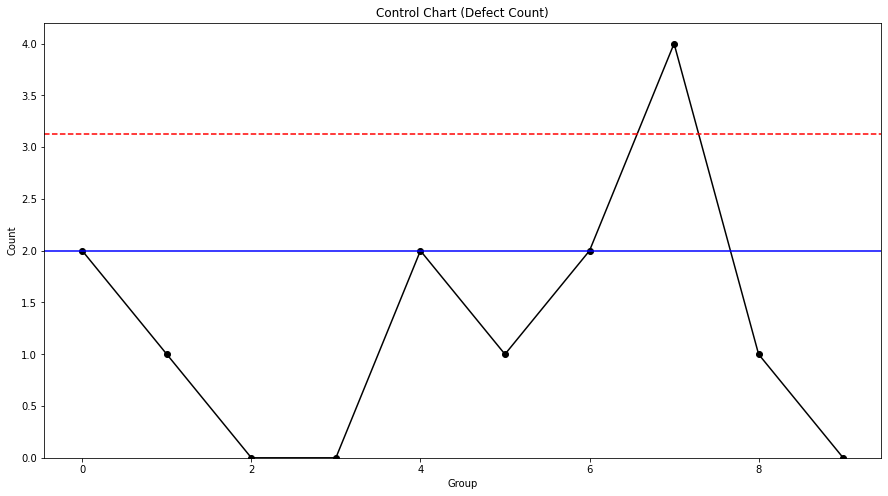

In [104]:
# creating dummy data
np.random.seed(4)
c = pd.DataFrame({'defects':np.random.randint(0,5,10).tolist(),
    'group_size':np.repeat(100,10).tolist()})

# plotting control chart
plt.figure(figsize=(15,8))
plt.plot(c['defects'], linestyle='-', marker='o', color='black')
plt.axhline(2, color='blue')
plt.axhline(2 + 3*np.std(c['defects'])/np.sqrt(10), color='red', linestyle='dashed')
plt.ylim(bottom=0)
plt.title('Control Chart (Defect Count)')
plt.xlabel('Group')
plt.ylabel('Count')

# validating limits
i = 0
control = True
print('Result:')
for num in c['defects']:
    if num > 2 + 3*np.std(c['defects'])/np.sqrt(10):
        print('Group', i, 'out of defects control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')